# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [466]:
import pandas as pd

df_flights = pd.read_csv('data/flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [01 - Flights Challenge.ipynb](01%20-%20Flights%20Solution.ipynb).

In [467]:
# Calculate number of flights with Delay 15 min null
df_flights.isnull().sum()



Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [468]:
# Visualize  flights with Delay 15 min null
#df_flights[df_flights.isnull().any(axis=1)].Depdelay15.describe()
df_flights[df_flights.isnull().any(axis=1)][['DepDelay','DepDel15']]

,DepDelay,DepDel15
171,0,NaN
359,0,NaN
429,0,NaN
545,0,NaN
554,0,NaN
...,...,...
271410,0,NaN
271607,0,NaN
271634,0,NaN
271671,0,NaN


In [469]:
df_flights[df_flights.isnull().any(axis=1)].DepDel15.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: DepDel15, dtype: float64

In [470]:
#Replace values null in column DepDel15 by 0
df_flights.DepDel15 = df_flights.DepDel15.fillna(0)
df_flights.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

DepDelay 
Minimum:-63.00
Mean:10.35
Median:-1.00
Mode:-3.00
Maximum:1425.00

ArrDelay 
Minimum:-75.00
Mean:6.50
Median:-3.00
Mode:0.00
Maximum:1440.00



C:\Users\ignaciops\AppData\Local\Temp\ipykernel_19956\464713487.py:39: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\ignaciops\AppData\Local\Temp\ipykernel_19956\464713487.py:39: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


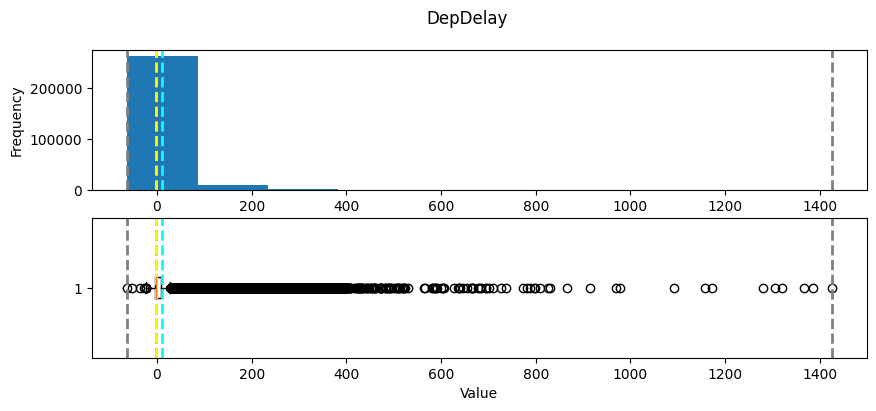

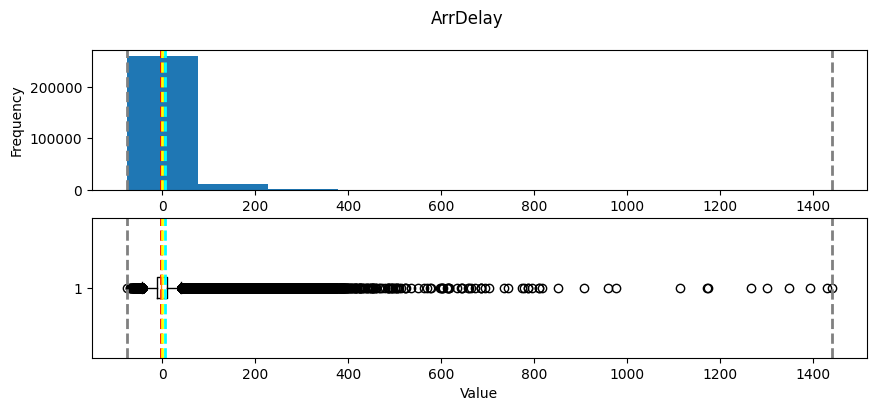

In [471]:


def plot_flights(data):
  from matplotlib import pyplot as plt
  min_val = data.min()
  max_val = data.max()
  mean_val = data.mean()
  med_val = data.median()
  mod_val = data.mode()[0]

  print(data.name,'\nMinimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                        mean_val,
                                                                                        med_val,
                                                                                        mod_val,
                                                                                      max_val))

  # Create a figure with 2 subplots and set the figure size
  fig,ax = plt.subplots(2,1,figsize=(10,4))
  # Plot a histogram
  ax[0].hist(data)
  ax[0].set_ylabel('Frequency')
  ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
  ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
  ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
  ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
  ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)
    

  ax[1].boxplot(data,vert=False)
  ax[1].set_xlabel('Value')
  ax[1].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
  ax[1].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
  ax[1].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
  ax[1].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
  ax[1].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)
    

  fig.suptitle(data.name)

  #Draw the plot
  fig.show()



# Call plot_flights() with the data for the flights
delayFields = ['DepDelay','ArrDelay']
for col in delayFields:
  plot_flights(df_flights[col])



ArrDelay 
q01:-33.00
q99:38.00


DepDelay 
q01:-12.00
q99:17.00

DepDelay 
Minimum:-11.00
Mean:-0.92
Median:-2.00
Mode:-3.00
Maximum:16.00

ArrDelay 
Minimum:-32.00
Mean:-5.03
Median:-6.00
Mode:0.00
Maximum:37.00



C:\Users\ignaciops\AppData\Local\Temp\ipykernel_19956\464713487.py:39: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\ignaciops\AppData\Local\Temp\ipykernel_19956\464713487.py:39: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


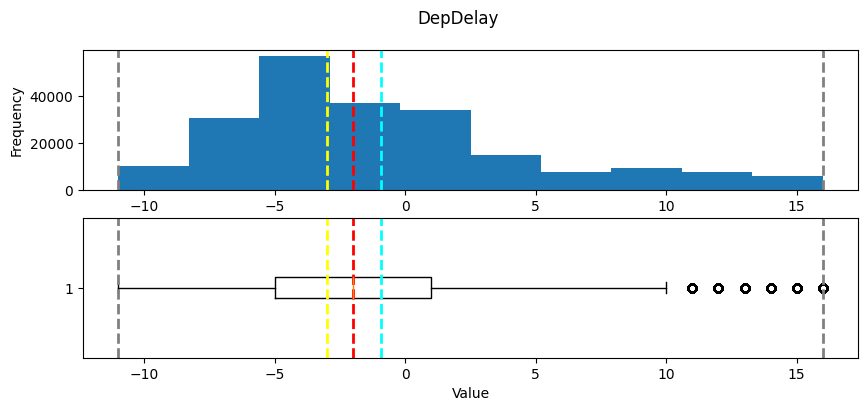

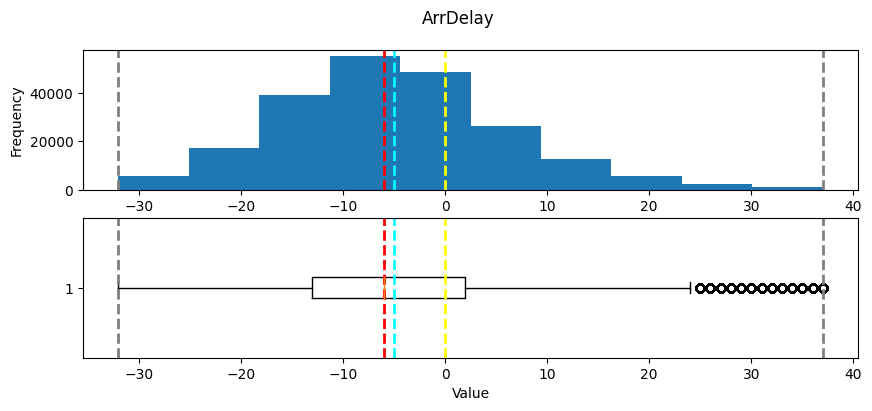

In [472]:
#Remove outliers from the dataset
adquantile01=df_flights.ArrDelay.quantile(0.01)
adquantile90=df_flights.ArrDelay.quantile(0.90)
df_flights = df_flights[df_flights.ArrDelay < adquantile90]
df_flights = df_flights[df_flights.ArrDelay > adquantile01]

print('\nArrDelay \nq01:{:.2f}\nq99:{:.2f}\n'.format(adquantile01,adquantile90))

ddquantile01= df_flights.DepDelay.quantile(0.01)
ddquantile90= df_flights.DepDelay.quantile(0.90)
df_flights = df_flights[df_flights.DepDelay < ddquantile90]
df_flights = df_flights[df_flights.DepDelay > ddquantile01]

print('\nDepDelay \nq01:{:.2f}\nq99:{:.2f}\n'.format(ddquantile01,ddquantile90))


plot_flights(df_flights['DepDelay'])
plot_flights(df_flights['ArrDelay'])



In [473]:
df_flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,214397.0,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000
mean,2013.0,7.018368,15.794703,3.902737,12757.827661,12726.276147,1278.223879,-0.921692,0.018116,1461.406596,-5.030276,0.068602,0.013228
std,0.0,2.006398,8.859118,1.997744,1510.058629,1506.251757,469.440262,5.708594,0.133371,485.676457,11.424280,0.252776,0.114249
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-11.000000,0.000000,1.000000,-32.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,850.000000,-5.000000,0.000000,1054.000000,-13.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1235.000000,-2.000000,0.000000,1445.000000,-6.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14100.000000,14057.000000,1655.000000,1.000000,0.000000,1845.000000,2.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,16.000000,1.000000,2359.000000,37.000000,1.000000,1.000000


#### What are the average (mean) departure and arrival delays?

In [474]:
df_flights[['DepDelay','ArrDelay']].mean()

DepDelay   -0.921692
ArrDelay   -5.030276
dtype: float64

#### How do the carriers compare in terms of arrival delay performance?

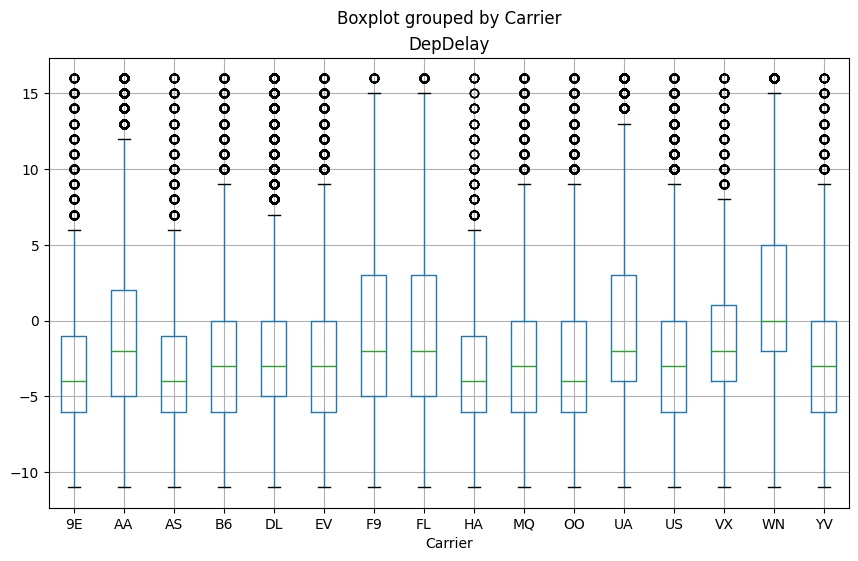

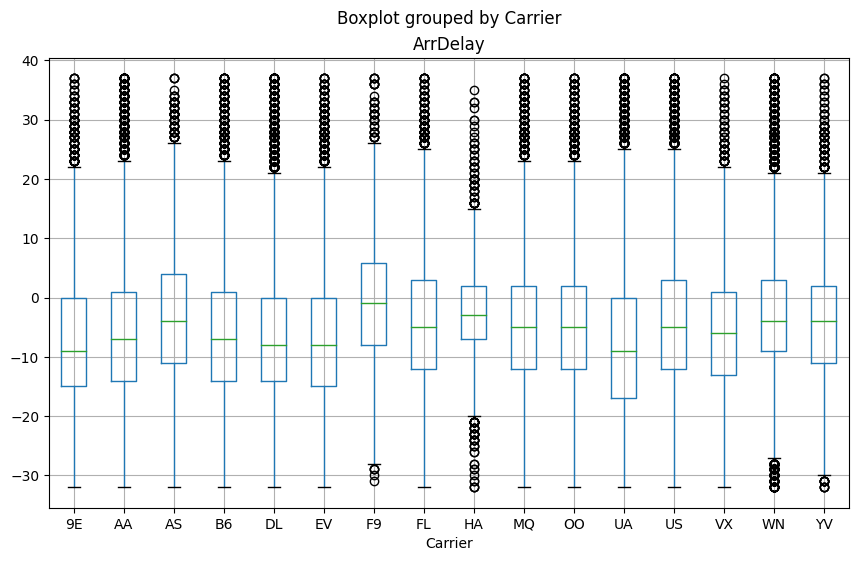

In [475]:
for col in delayFields:
  df_flights.boxplot(column=col, by='Carrier', figsize=(10, 6))

#### Are some days of the week more prone to arrival days than others?

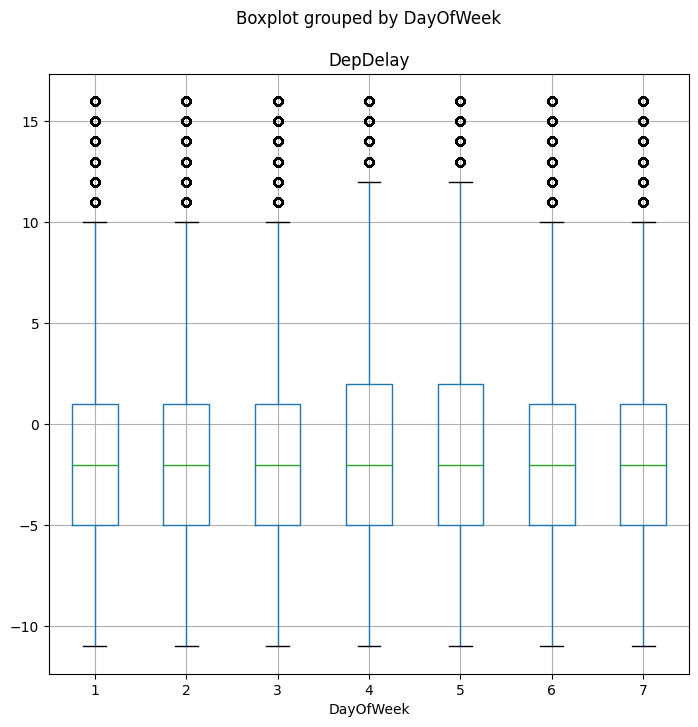

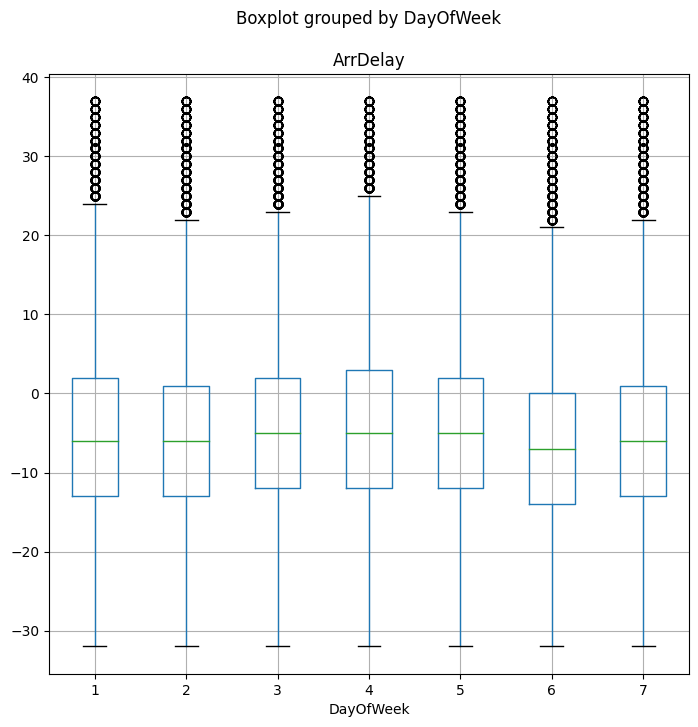

In [476]:
for col in delayFields:
  df_flights.boxplot(column=col, by='DayOfWeek', figsize=(8, 8))

#### Which departure airport has the highest average departure delay?

<Axes: xlabel='OriginAirportName'>

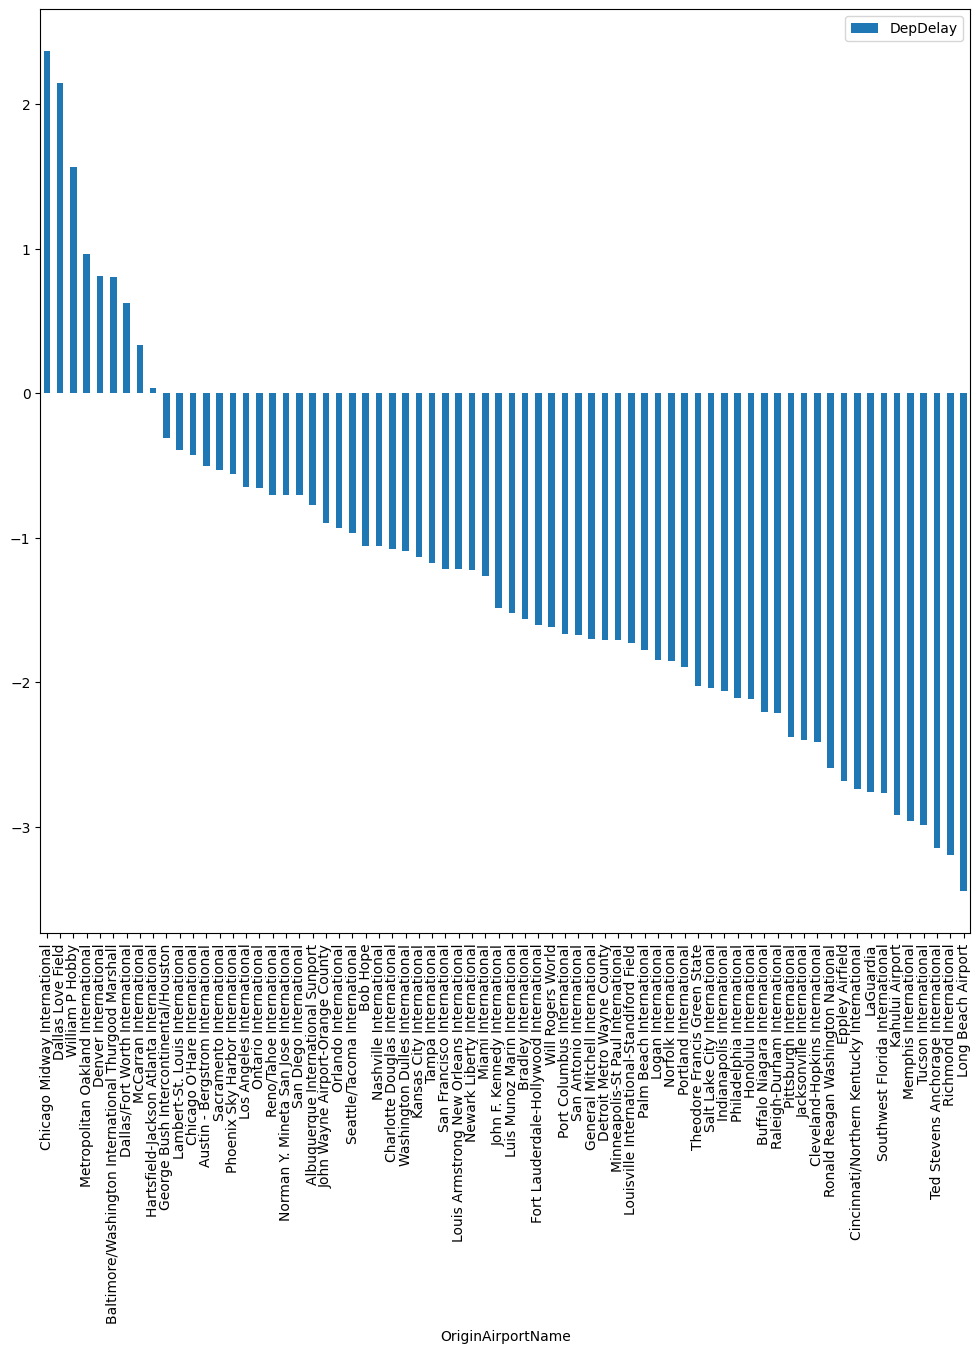

In [477]:
#Agrupamos por 
dfframe = pd.DataFrame(df_flights.groupby(df_flights.OriginAirportName)['DepDelay'].mean()).sort_values(by='DepDelay', ascending=False)

dfframe.plot(kind="bar",figsize=(12,12))

#### Do **late** departures tend to result in longer arrival delays than on-time departures?

<Axes: title={'center': 'ArrDelay'}, xlabel='DepDel15'>

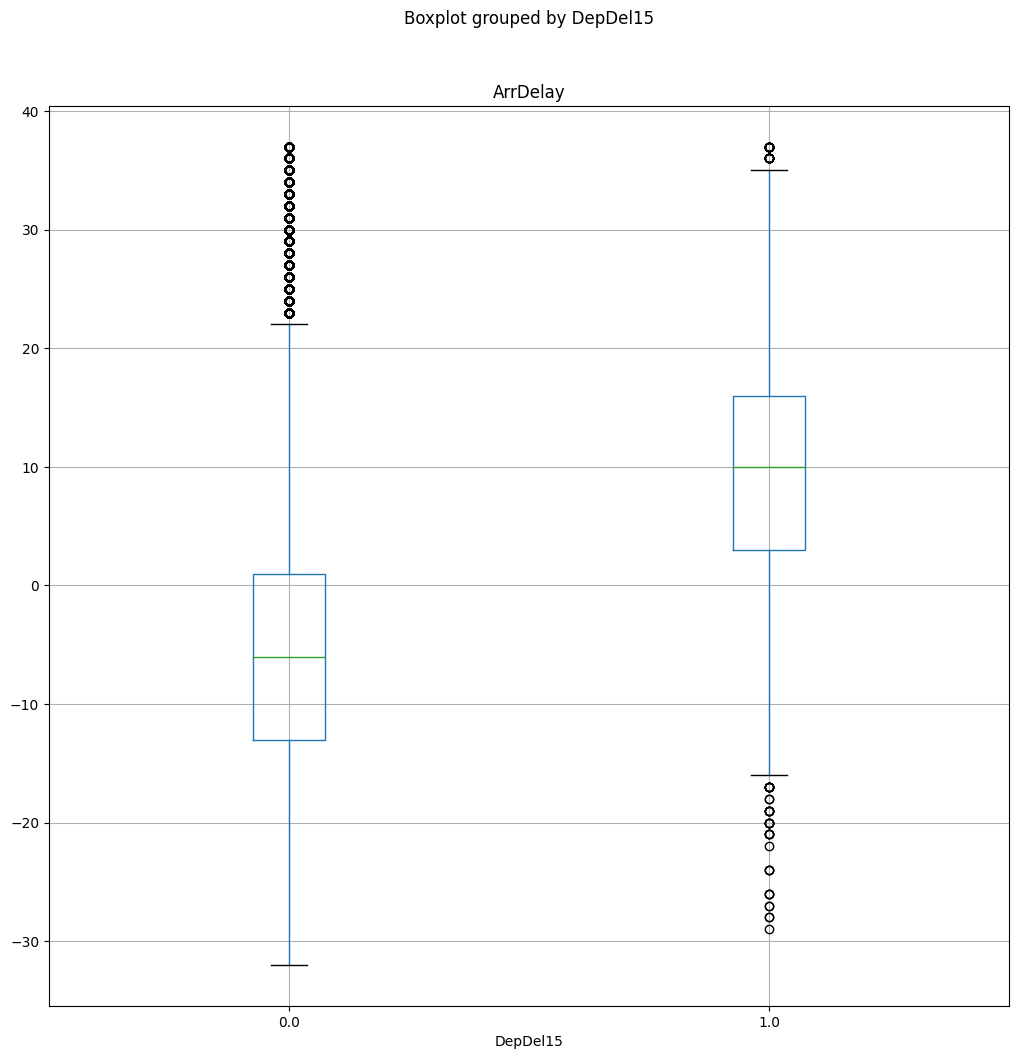

In [478]:
depDelay  = pd.Series(df_flights['DepDel15'] > 0)
df_flights = pd.concat([df_flights, depDelay.rename('WithDepDelay')], axis=1)

#df_flights
question5df = pd.DataFrame(df_flights.groupby(df_flights.WithDepDelay)['ArrDelay'].mean())
question5df


#Alternative
df_flights.boxplot(column='ArrDelay', by='DepDel15', figsize=(12,12))







#### Which route (from origin airport to destination airport) has the most **late** arrivals?

In [479]:
routes  = pd.Series(df_flights['OriginAirportName'].astype(str) + "-" + df_flights['DestAirportName'].astype(str), name='LateArrivals')
df_flights = pd.concat([df_flights, routes.rename('Route')], axis=1)

#df_flights_group = df_flights.groupby(df_flights.Route)

(df_flights.groupby(df_flights.Route)['ArrDel15'].sum()).sort_values(ascending=False)


Route
San Francisco International-Los Angeles International                    90
Los Angeles International-San Francisco International                    69
LaGuardia-Hartsfield-Jackson Atlanta International                       68
Los Angeles International-John F. Kennedy International                  52
LaGuardia-Charlotte Douglas International                                51
                                                                         ..
Logan International-Austin - Bergstrom International                      0
Logan International-Memphis International                                 0
Logan International-Port Columbus International                           0
San Diego International-Cincinnati/Northern Kentucky International        0
Louis Armstrong New Orleans International-San Francisco International     0
Name: ArrDel15, Length: 2479, dtype: int64

#### Which route has the highest average arrival delay?

In [480]:
#routes  = pd.Series(df_flights['OriginAirportName'].astype(str) + "-" + df_flights['DestAirportName'].astype(str), name='LateArrivals')
#df_flights = pd.concat([df_flights, routes.rename('Route')], axis=1)



(df_flights.groupby(df_flights.Route)['ArrDelay'].mean()).sort_values(ascending=False)

#pd.DataFrame(route_group['ArrDelay'].mean()).sort_values('ArrDelay', ascending=False)

Route
Louis Armstrong New Orleans International-Ronald Reagan Washington National    24.500000
Cleveland-Hopkins International-Palm Beach International                       18.000000
John F. Kennedy International-Louisville International-Standiford Field        18.000000
Cleveland-Hopkins International-Philadelphia International                     12.800000
Memphis International-Denver International                                      9.758621
                                                                                 ...    
Lambert-St. Louis International-Cleveland-Hopkins International               -20.000000
Eppley Airfield-LaGuardia                                                     -20.750000
Denver International-Kahului Airport                                          -22.666667
Jacksonville International-Chicago Midway International                       -24.125000
Indianapolis International-Logan International                                -26.000000
Name: ArrDelay,